In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/telcom_data.csv'
Data = pd.read_csv(file_path)
Data.head()

Bearer Id         Start  Start ms           End  End ms  \
0  13114483460844900000  43559.500903     770.0  43580.607998   662.0   
1  13114483482878900000  43564.544491     235.0  43580.344306   606.0   
2  13114483484080500000  43564.737627       1.0  43580.498762   652.0   
3  13114483485442800000  43565.021817     486.0  43580.317072   171.0   
4  13114483499480700000  43567.840544     565.0  43580.444815   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI Last Location Name  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   9164566995485190   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13            L77566A   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13            D42335A   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13            T21824A   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13            D88865A   

   ...  Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0  ...          15854611.0           2501332.0           8198936.0   
1  ...          20247395.0          19111729.0          18338413.0   
2  ...          19725661.0          14699576.0          17587794.0   
3  ...          21388122.0          15146643.0          13994646.0   
4  ...          15259380.0          18962873.0          17124581.0   

   Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
0           9656251.0        278082303.0         14344150.0       171744450.0   
1          17227132.0        608750074.0          1170709.0       526904238.0   
2           6163408.0        229584621.0           395630.0       410692588.0   
3           1097942.0        799538153.0         10849722.0       749039933.0   
4            415218.0        527707248.0          3529801.0       550709500.0   

   Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
0         8814393.0        36749741.0       308879636.0  
1        15055145.0        53800391.0       653384965.0  
2         4215763.0        27883638.0       279807335.0  
3        12797283.0        43324218.0       846028530.0  
4        13910322.0        38542814.0       569138589.0  

[5 rows x 55 columns]

Task 3 - Experience Analytics
- User experience is influenced by various performance parameters and user device characteristics.
- Analyzing these factors helps optimize products and services to meet user expectations.
- Focus Areas:
• Network Parameters: TCP retransmission, Round Trip Time (RTT), Throughput
• Device Characteristics: Handset type

Task 3.1 - Aggregate Experience Metrics

In [ ]:
Data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [ ]:
Data['Start'] = Data['Start'].fillna(Data['Start'].mean())
Data['Start ms'] = Data['Start ms'].fillna(Data['Start ms'].mean())
Data['End'] = Data['End'].fillna(Data['End'].mean())
Data['End ms'] = Data['End ms'].fillna(Data['End ms'].mean())
Data['Dur. (ms)'] = Data['Dur. (ms)'].fillna(Data['Dur. (ms)'].mean())

In [ ]:
Data['Activity Duration DL (ms)'] = Data['Activity Duration DL (ms)'].fillna(Data['Activity Duration DL (ms)'].mean())
Data['Activity Duration UL (ms)'] = Data['Activity Duration UL (ms)'].fillna(Data['Activity Duration UL (ms)'].mean())
Data['Dur. (ms).1'] = Data['Dur. (ms).1'].fillna(Data['Dur. (ms).1'].mean())
Data['Total UL (Bytes)'] = Data['Total UL (Bytes)'].fillna(Data['Total UL (Bytes)'].mean())
Data['Total DL (Bytes)'] = Data['Total DL (Bytes)'].fillna(Data['Total DL (Bytes)'].mean())

In [ ]:
Data['IMSI'] = Data['IMSI'].fillna(0)
Data['MSISDN/Number'] = Data['MSISDN/Number'].fillna(0)
Data['MSISDN/Number'] = Data['MSISDN/Number'].fillna(0)

In [ ]:
Data['Avg Bearer TP DL (kbps)'] = Data['Avg Bearer TP DL (kbps)'].fillna(Data['Avg Bearer TP DL (kbps)'].mean())
Data['Avg Bearer TP UL (kbps)'] = Data['Avg Bearer TP UL (kbps)'].fillna(Data['Avg Bearer TP UL (kbps)'].mean())

In [ ]:
numerical_cols = Data.select_dtypes(include='number').columns
numerical_cols

Index(['Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
  

In [ ]:
Data[numerical_cols] = Data[numerical_cols].fillna(Data[numerical_cols].mean())

In [ ]:
Data['Last Location Name'] = Data['Last Location Name'].fillna('Unknown')
Data['Handset Manufacturer'] = Data['Handset Manufacturer'].fillna('Unknown')
Data['Handset Type'] = Data['Handset Type'].fillna('Unknown')

In [ ]:
Data.isna().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)               0
50 Kbps < UL TP < 300 Kbps (%)              0
UL TP > 300 Kbps (%)                        0
HTTP DL (Bytes)                             0
HTTP UL (Bytes)                             0
Activity Duration DL (ms)                   0
Activity Duration UL (ms)                   0
Dur. (ms).1                                 0
Handset Manufacturer                        0
Handset Type                                0
Nb of sec with 125000B < Vol DL             0
Nb of sec with 1250B < Vol UL < 6250B       0
Nb of sec with 31250B < Vol DL < 125000B    0
Nb of sec with 37500B < Vol UL              0
Nb of sec with 6250B < Vol DL < 31250B      0
Nb of sec with 6250B < Vol UL < 37500B      0
Nb of sec with Vol DL < 6250B               0
Nb of sec with Vol UL < 1250B               0
Social Media DL (Bytes)                     0
Social Media UL (Bytes)                     0
Google DL (Bytes)                           0
Google UL (Bytes)                           0
Email DL (Bytes)                            0
Email UL (Bytes)                            0
Youtube DL (Bytes)                          0
Youtube UL (Bytes)                          0
Netflix DL (Bytes)                          0
Netflix UL (Bytes)                          0
Gaming DL (Bytes)                           0
Gaming UL (Bytes)                           0
Other DL (Bytes)                            0
Other UL (Bytes)                            0
Total UL (Bytes)                            0
Total DL (Bytes)                            0
dtype: int64

In [ ]:
# Normalize column names (strip spaces and convert to lowercase)
Data.columns = Data.columns.str.strip().str.lower()

In [ ]:
Data.columns

Index(['bearer id', 'start', 'start ms', 'end', 'end ms', 'dur. (ms)', 'imsi',
       'msisdn/number', 'imei', 'last location name', 'avg rtt dl (ms)',
       'avg rtt ul (ms)', 'avg bearer tp dl (kbps)', 'avg bearer tp ul (kbps)',
       'tcp dl retrans. vol (bytes)', 'tcp ul retrans. vol (bytes)',
       'dl tp < 50 kbps (%)', '50 kbps < dl tp < 250 kbps (%)',
       '250 kbps < dl tp < 1 mbps (%)', 'dl tp > 1 mbps (%)',
       'ul tp < 10 kbps (%)', '10 kbps < ul tp < 50 kbps (%)',
       '50 kbps < ul tp < 300 kbps (%)', 'ul tp > 300 kbps (%)',
       'http dl (bytes)', 'http ul (bytes)', 'activity duration dl (ms)',
       'activity duration ul (ms)', 'dur. (ms).1', 'handset manufacturer',
       'handset type', 'nb of sec with 125000b < vol dl',
       'nb of sec with 1250b < vol ul < 6250b',
       'nb of sec with 31250b < vol dl < 125000b',
       'nb of sec with 37500b < vol ul',
       'nb of sec with 6250b < vol dl < 31250b',
       'nb of sec with 6250b < vol ul < 37500b',


In [ ]:
# Selecting relevant columns for experience analytics
experience_columns = [
    'msisdn/number',
    'tcp dl retrans. vol (bytes)', 'tcp ul retrans. vol (bytes)',
    'avg rtt dl (ms)', 'avg rtt ul (ms)',
    'avg bearer tp dl (kbps)', 'avg bearer tp ul (kbps)',
    'handset type'
]

In [ ]:
# Subset the data with selected columns
experience_data = Data[experience_columns]

In [ ]:
experience_data.isna().sum()

msisdn/number                  0
tcp dl retrans. vol (bytes)    0
tcp ul retrans. vol (bytes)    0
avg rtt dl (ms)                0
avg rtt ul (ms)                0
avg bearer tp dl (kbps)        0
avg bearer tp ul (kbps)        0
handset type                   0
dtype: int64

In [ ]:
# Aggregate per customer (MSISDN/Number)
aggregated_experience = experience_data.groupby('msisdn/number').agg({
    'tcp dl retrans. vol (bytes)': 'mean',
    'tcp ul retrans. vol (bytes)': 'mean',
    'avg rtt dl (ms)': 'mean',
    'avg rtt ul (ms)': 'mean',
    'avg bearer tp dl (kbps)': 'mean',
    'avg bearer tp ul (kbps)': 'mean',
    'handset type': lambda x: x.mode()[0]  # Most frequent handset type per user
}).reset_index()

In [ ]:
aggregated_experience

msisdn/number  tcp dl retrans. vol (bytes)  \
0        0.000000e+00                 1.655032e+07   
1        3.360100e+10                 2.080991e+07   
2        3.360100e+10                 2.080991e+07   
3        3.360100e+10                 2.080991e+07   
4        3.360101e+10                 1.066000e+03   
...               ...                          ...   
106852   3.379000e+10                 2.150440e+05   
106853   3.379000e+10                 2.080991e+07   
106854   3.197021e+12                 2.080991e+07   
106855   3.370000e+14                 2.080991e+07   
106856   8.823971e+14                 2.080991e+07   

        tcp ul retrans. vol (bytes)  avg rtt dl (ms)  avg rtt ul (ms)  \
0                     433659.857241       288.542407        20.581575   
1                     759658.664811        46.000000         0.000000   
2                     759658.664811        30.000000         1.000000   
3                     759658.664811       109.795706        17.662883   
4                     759658.664811        69.000000        15.000000   
...                             ...              ...              ...   
106852                  3001.000000        42.000000        10.000000   
106853                759658.664811        34.000000         6.000000   
106854                759658.664811       109.795706        17.662883   
106855                759658.664811       109.795706        17.662883   
106856                759658.664811       109.795706        17.662883   

        avg bearer tp dl (kbps)  avg bearer tp ul (kbps)  \
0                    15238.5113              1720.431922   
1                       37.0000                39.000000   
2                       48.0000                51.000000   
3                       48.0000                49.000000   
4                      204.0000                44.000000   
...                         ...                      ...   
106852                9978.0000               387.000000   
106853                  68.0000                48.000000   
106854                   1.0000                 0.000000   
106855                  11.0000                22.000000   
106856                   2.0000                 0.000000   

                            handset type  
0                                Unknown  
1         Huawei P20 Lite Huawei Nova 3E  
2                 Apple iPhone 7 (A1778)  
3                              undefined  
4                Apple iPhone 5S (A1457)  
...                                  ...  
106852               Huawei Honor 9 Lite  
106853       Apple iPhone 8 Plus (A1897)  
106854  Quectel Wireless. Quectel Ec25-E  
106855                  Huawei B525S-23A  
106856  Quectel Wireless. Quectel Ec21-E  

[106857 rows x 8 columns]

In [ ]:
# Rename columns for better readability
aggregated_experience.rename(columns={
    'tcp dl retrans. vol (bytes)': 'avg_tcp_dl_retrans_bytes',
    'tcp ul retrans. vol (bytes)': 'avg_tcp_ul_retrans_bytes',
    'avg rtt dl (ms)': 'avg_rtt_dl_ms',
    'avg rtt ul (ms)': 'avg_rtt_ul_ms',
    'avg bearer tp dl (kbps)': 'avg_throughput_dl_kbps',
    'avg bearer tp ul (kbps)': 'avg_throughput_ul_kbps',
    'handset type': 'most_used_handset'
}, inplace=True)

In [ ]:
aggregated_experience

msisdn/number  avg_tcp_dl_retrans_bytes  avg_tcp_ul_retrans_bytes  \
0        0.000000e+00              1.655032e+07             433659.857241   
1        3.360100e+10              2.080991e+07             759658.664811   
2        3.360100e+10              2.080991e+07             759658.664811   
3        3.360100e+10              2.080991e+07             759658.664811   
4        3.360101e+10              1.066000e+03             759658.664811   
...               ...                       ...                       ...   
106852   3.379000e+10              2.150440e+05               3001.000000   
106853   3.379000e+10              2.080991e+07             759658.664811   
106854   3.197021e+12              2.080991e+07             759658.664811   
106855   3.370000e+14              2.080991e+07             759658.664811   
106856   8.823971e+14              2.080991e+07             759658.664811   

        avg_rtt_dl_ms  avg_rtt_ul_ms  avg_throughput_dl_kbps  \
0          288.542407      20.581575              15238.5113   
1           46.000000       0.000000                 37.0000   
2           30.000000       1.000000                 48.0000   
3          109.795706      17.662883                 48.0000   
4           69.000000      15.000000                204.0000   
...               ...            ...                     ...   
106852      42.000000      10.000000               9978.0000   
106853      34.000000       6.000000                 68.0000   
106854     109.795706      17.662883                  1.0000   
106855     109.795706      17.662883                 11.0000   
106856     109.795706      17.662883                  2.0000   

        avg_throughput_ul_kbps                 most_used_handset  
0                  1720.431922                           Unknown  
1                    39.000000    Huawei P20 Lite Huawei Nova 3E  
2                    51.000000            Apple iPhone 7 (A1778)  
3                    49.000000                         undefined  
4                    44.000000           Apple iPhone 5S (A1457)  
...                        ...                               ...  
106852              387.000000               Huawei Honor 9 Lite  
106853               48.000000       Apple iPhone 8 Plus (A1897)  
106854                0.000000  Quectel Wireless. Quectel Ec25-E  
106855               22.000000                  Huawei B525S-23A  
106856                0.000000  Quectel Wireless. Quectel Ec21-E  

[106857 rows x 8 columns]

In [ ]:
aggregated_experience.isna().sum()

msisdn/number               0
avg_tcp_dl_retrans_bytes    0
avg_tcp_ul_retrans_bytes    0
avg_rtt_dl_ms               0
avg_rtt_ul_ms               0
avg_throughput_dl_kbps      0
avg_throughput_ul_kbps      0
most_used_handset           0
dtype: int64

In [ ]:
aggregated_experience.columns

Index(['msisdn/number', 'avg_tcp_dl_retrans_bytes', 'avg_tcp_ul_retrans_bytes',
       'avg_rtt_dl_ms', 'avg_rtt_ul_ms', 'avg_throughput_dl_kbps',
       'avg_throughput_ul_kbps', 'most_used_handset'],
      dtype='object')

In [ ]:
# Save the aggregated results to CSV
aggregated_experience.to_csv("aggregated_experience_metrics.csv", index=False)

In [ ]:
# For Google Colab users, enable download
try:
    from google.colab import files
    files.download("aggregated_experience_metrics.csv")
except ImportError:
    print("Download function not available outside Colab.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the aggregated experience metrics CSV file
file_path = "aggregated_experience_metrics.csv"
aggregated_experience = pd.read_csv(file_path)

In [ ]:
# Display summary statistics of experience metrics
experience_summary = aggregated_experience.describe()

In [ ]:
experience_summary

msisdn/number  avg_tcp_dl_retrans_bytes  avg_tcp_ul_retrans_bytes  \
count   1.068570e+05              1.068570e+05              1.068570e+05   
mean    4.511432e+10              2.011162e+07              7.358832e+05   
std     2.889410e+12              9.774344e+07              1.244874e+07   
min     0.000000e+00              2.000000e+00              1.000000e+00   
25%     3.365088e+10              4.978710e+06              2.858878e+05   
50%     3.366365e+10              2.080991e+07              7.596587e+05   
75%     3.368344e+10              2.080991e+07              7.596587e+05   
max     8.823971e+14              4.289488e+09              2.455600e+09   

       avg_rtt_dl_ms  avg_rtt_ul_ms  avg_throughput_dl_kbps  \
count  106857.000000  106857.000000           106857.000000   
mean      117.966734      16.793390            11634.031985   
std       578.932399      73.513719            20605.639709   
min         0.000000       0.000000                0.000000   
25%        35.000000       3.000000               43.000000   
50%        56.000000       7.000000              110.000000   
75%       109.795706      17.662883            16816.000000   
max     96923.000000    7120.000000           264448.000000   

       avg_throughput_ul_kbps  
count           106857.000000  
mean              1518.880680  
std               3912.090642  
min                  0.000000  
25%                 48.000000  
50%                 75.500000  
75%               1006.000000  
max              58613.000000

In [ ]:
# Count unique handset types to understand the variety of devices
handset_counts = aggregated_experience['most_used_handset'].value_counts()

In [ ]:
handset_counts

most_used_handset
Huawei B528S-23A                    10615
Apple iPhone 6S (A1688)              6759
undefined                            6669
Apple iPhone 6 (A1586)               6260
Apple iPhone 7 (A1778)               4699
                                    ...  
Wistron Wnc D18Qx                       1
Samsung Galaxy On5 (Sm-G550X)           1
Archos Sa Archos 40 Helium              1
Shenzhen Sprocom. Fly Iq4490            1
Quectel Wireless. Quectel Ec21-E        1
Name: count, Length: 1395, dtype: int64

In [ ]:
# Finding top 5 most common handset types
top_5_handsets = handset_counts.head(5)

In [ ]:
top_5_handsets

most_used_handset
Huawei B528S-23A           10615
Apple iPhone 6S (A1688)     6759
undefined                   6669
Apple iPhone 6 (A1586)      6260
Apple iPhone 7 (A1778)      4699
Name: count, dtype: int64

In [ ]:
# Handling outliers using the IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

In [ ]:
aggregated_experience = handle_outliers(aggregated_experience, 'avg_throughput_dl_kbps')
aggregated_experience = handle_outliers(aggregated_experience, 'avg_throughput_ul_kbps')

In [ ]:
# Summary statistics after cleaning
throughput_summary = aggregated_experience[['avg_throughput_dl_kbps', 'avg_throughput_ul_kbps']].describe()
print("\nThroughput Summary Statistics:")
print(throughput_summary)


Throughput Summary Statistics:
       avg_throughput_dl_kbps  avg_throughput_ul_kbps
count           106857.000000           106857.000000
mean              9669.165115              648.285968
std              14495.060205              884.850500
min                  0.000000                0.000000
25%                 43.000000               48.000000
50%                110.000000               75.500000
75%              16816.000000             1006.000000
max              41975.500000             2443.000000


In [ ]:
# Save cleaned data to CSV
aggregated_experience.to_csv("cleaned_aggregated_experience.csv", index=False)
print("Cleaned aggregated experience data saved as 'cleaned_aggregated_experience.csv'.")

Cleaned aggregated experience data saved as 'cleaned_aggregated_experience.csv'.


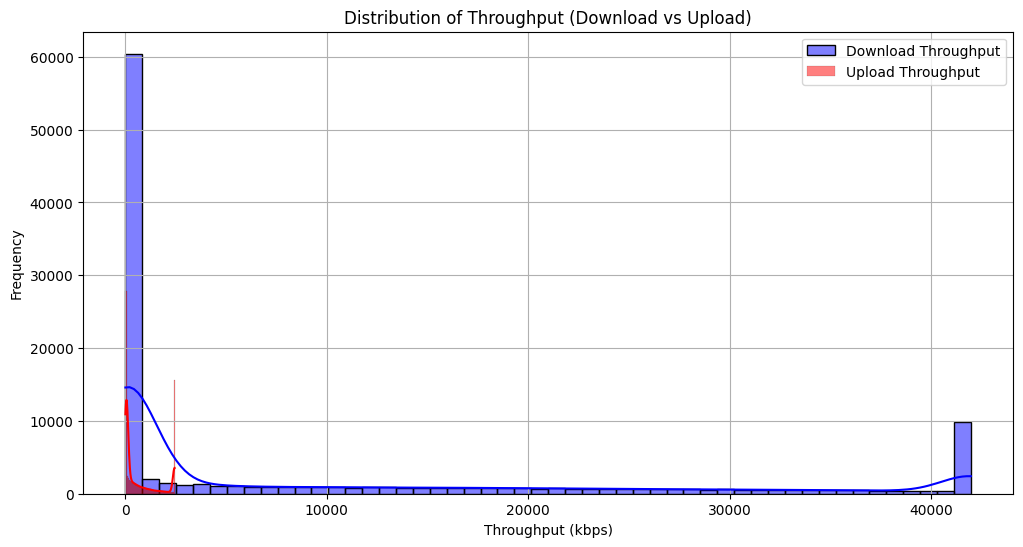

In [ ]:
# Visualize the cleaned throughput data
plt.figure(figsize=(12, 6))
sns.histplot(aggregated_experience['avg_throughput_dl_kbps'], bins=50, kde=True, color='blue', label='Download Throughput')
sns.histplot(aggregated_experience['avg_throughput_ul_kbps'], bins=50, kde=True, color='red', label='Upload Throughput')
plt.title('Distribution of Throughput (Download vs Upload)')
plt.xlabel('Throughput (kbps)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Check if running in Google Colab and download the file if available
try:
    from google.colab import files
    files.download("cleaned_aggregated_experience.csv")
except ImportError:
    print("Download function not available outside Google Colab.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Exclude non-numeric columns for correlation analysis
numeric_columns = aggregated_experience.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

                          msisdn/number  avg_tcp_dl_retrans_bytes  \
msisdn/number                  1.000000                  0.000028   
avg_tcp_dl_retrans_bytes       0.000028                  1.000000   
avg_tcp_ul_retrans_bytes       0.000008                  0.015874   
avg_rtt_dl_ms                 -0.000056                 -0.007153   
avg_rtt_ul_ms                  0.000047                  0.015114   
avg_throughput_dl_kbps        -0.002639                  0.066645   
avg_throughput_ul_kbps        -0.002873                  0.059393   

                          avg_tcp_ul_retrans_bytes  avg_rtt_dl_ms  \
msisdn/number                             0.000008      -0.000056   
avg_tcp_dl_retrans_bytes                  0.015874      -0.007153   
avg_tcp_ul_retrans_bytes                  1.000000      -0.001921   
avg_rtt_dl_ms                            -0.001921       1.000000   
avg_rtt_ul_ms                             0.014778       0.008000   
avg_throughput_dl_kbps           

In [ ]:
# Convert the categorical 'most_used_handset' to numerical labels
aggregated_experience['most_used_handset_encoded'] = aggregated_experience['most_used_handset'].astype('category').cat.codes

# Now, perform correlation analysis including the encoded handset type
numeric_columns = aggregated_experience.drop(columns=['most_used_handset']).select_dtypes(include=['number'])
correlation_matrix_with_handset = numeric_columns.corr()

# Display correlation matrix with encoded handset
print(correlation_matrix_with_handset)

                           msisdn/number  avg_tcp_dl_retrans_bytes  \
msisdn/number                   1.000000                  0.000028   
avg_tcp_dl_retrans_bytes        0.000028                  1.000000   
avg_tcp_ul_retrans_bytes        0.000008                  0.015874   
avg_rtt_dl_ms                  -0.000056                 -0.007153   
avg_rtt_ul_ms                   0.000047                  0.015114   
avg_throughput_dl_kbps         -0.002639                  0.066645   
avg_throughput_ul_kbps         -0.002873                  0.059393   
most_used_handset_encoded       0.001612                 -0.026894   

                           avg_tcp_ul_retrans_bytes  avg_rtt_dl_ms  \
msisdn/number                              0.000008      -0.000056   
avg_tcp_dl_retrans_bytes                   0.015874      -0.007153   
avg_tcp_ul_retrans_bytes                   1.000000      -0.001921   
avg_rtt_dl_ms                             -0.001921       1.000000   
avg_rtt_ul_ms      

In [ ]:
correlation_matrix.to_csv("correlation_matrix.csv", index=True)
print("Correlation matrix saved as 'correlation_matrix.csv'")

Correlation matrix saved as 'correlation_matrix.csv'


In [ ]:
correlation_matrix_with_handset.to_csv("correlation_matrix_with_handset.csv", index=True)
print("Correlation matrix with handset saved as 'correlation_matrix_with_handset.csv'")

Correlation matrix with handset saved as 'correlation_matrix_with_handset.csv'


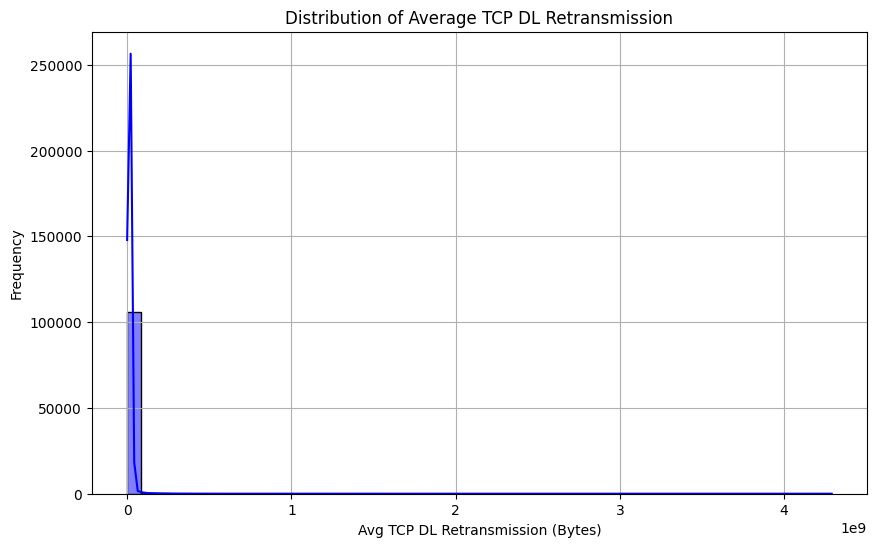

In [ ]:
# Plot distribution of average TCP DL retransmission rates
plt.figure(figsize=(10, 6))
sns.histplot(aggregated_experience['avg_tcp_dl_retrans_bytes'], bins=50, kde=True, color='blue')
plt.title('Distribution of Average TCP DL Retransmission')
plt.xlabel('Avg TCP DL Retransmission (Bytes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

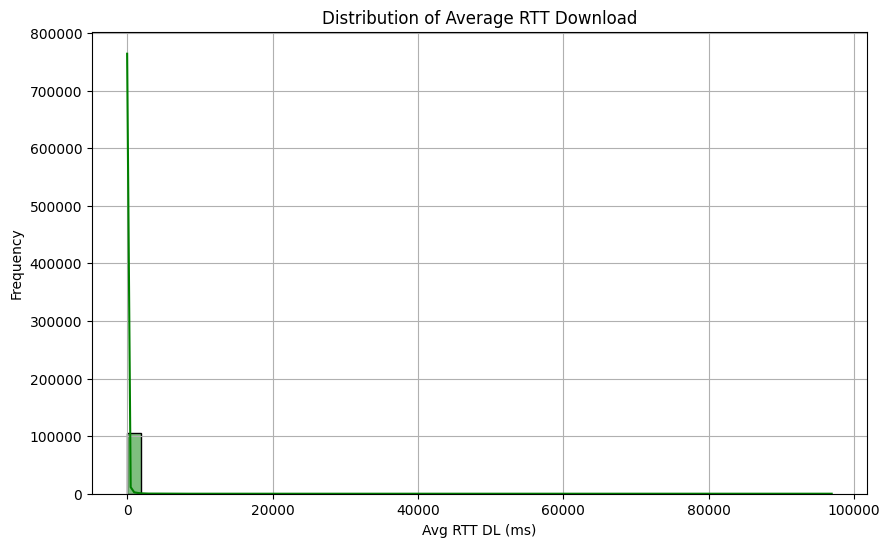

In [ ]:
# Plot distribution of average RTT download
plt.figure(figsize=(10, 6))
sns.histplot(aggregated_experience['avg_rtt_dl_ms'], bins=50, kde=True, color='green')
plt.title('Distribution of Average RTT Download')
plt.xlabel('Avg RTT DL (ms)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

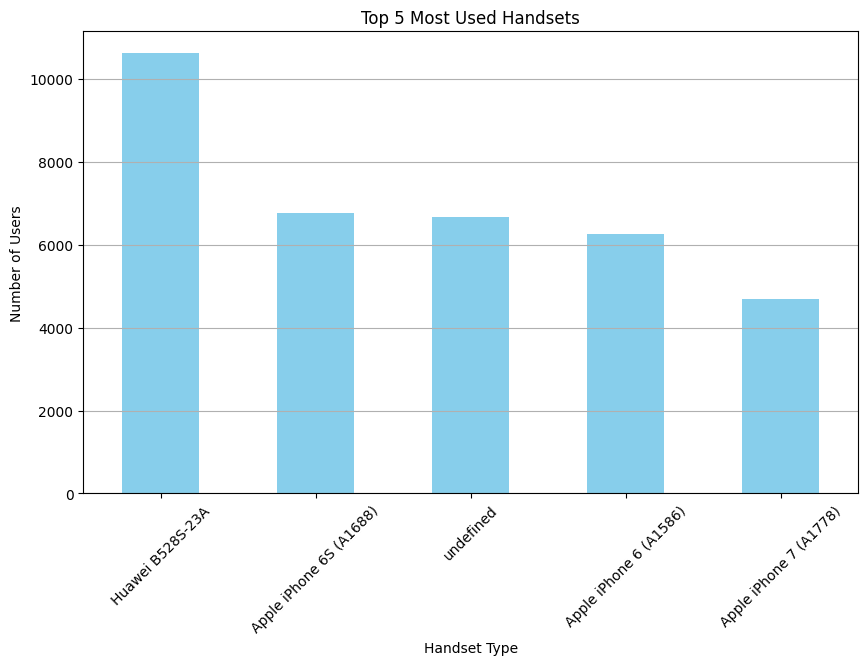

In [ ]:
# Visualizing the top 5 handset types
plt.figure(figsize=(10, 6))
top_5_handsets.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Used Handsets')
plt.xlabel('Handset Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

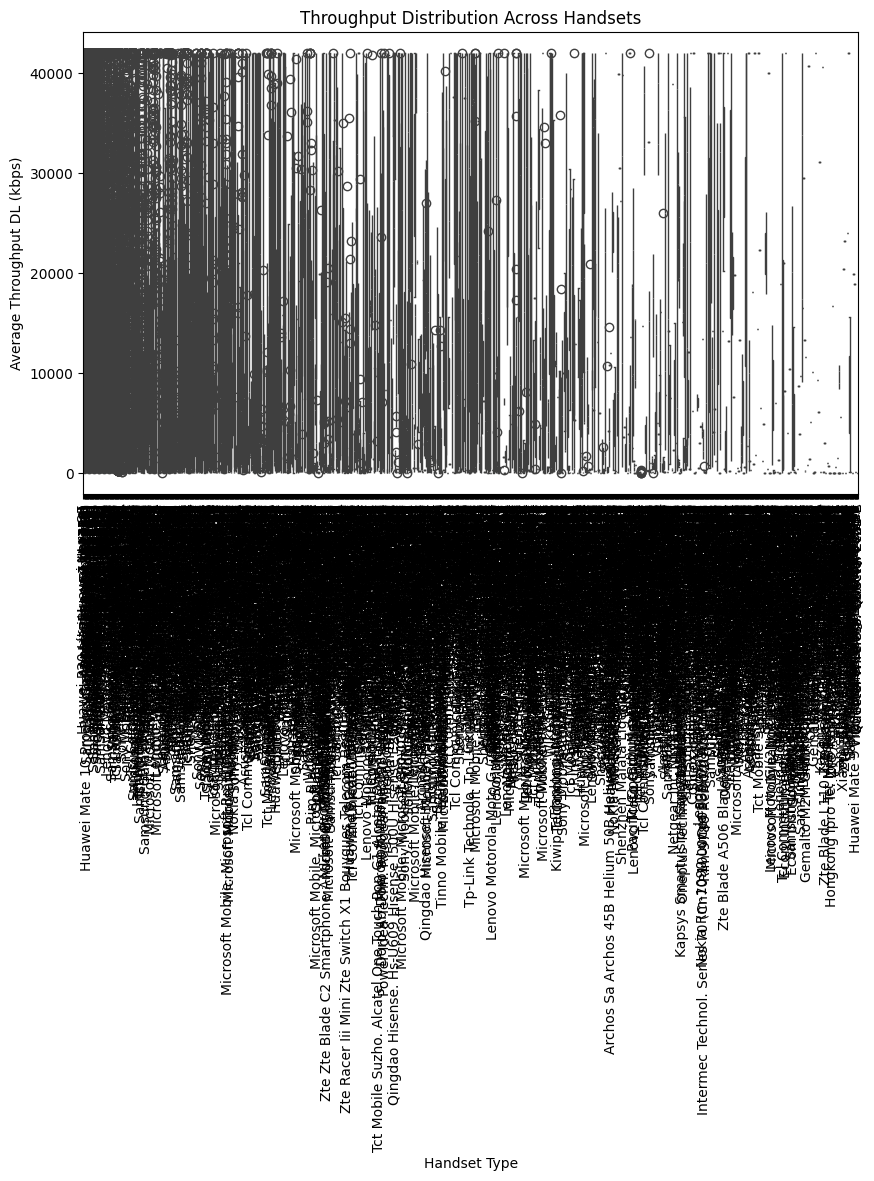

In [ ]:
# Visualizing throughput across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='most_used_handset', y='avg_throughput_dl_kbps', data=aggregated_experience)
plt.title('Throughput Distribution Across Handsets')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput DL (kbps)')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Save the analysis results to CSV files
experience_summary.to_csv("experience_summary.csv", index=False)

In [ ]:
print("Analysis completed and results saved as 'experience_summary.csv' and 'correlation_matrix.csv'")

Analysis completed and results saved as 'experience_summary.csv' and 'correlation_matrix.csv'


Task 3.2 - Top and Bottom Metrics
Deliverables:

•  Python Script Including:
-  Compute and list the top 10, bottom 10, and most frequent values for:

▪ - TCP values

▪ - RTT values

▪ - Throughput values

In [ ]:
# Load the cleaned dataset
file_path = "cleaned_aggregated_experience.csv"
aggregated_experience = pd.read_csv(file_path)

In [ ]:
# Function to compute top 10, bottom 10, and most frequent values for a given column
def compute_metrics(df, column):
    top_10 = df[column].nlargest(10)
    bottom_10 = df[column].nsmallest(10)
    most_frequent = df[column].value_counts().nlargest(10)
    return top_10, bottom_10, most_frequent

In [ ]:
# Compute metrics for TCP values (both download and upload)
top_tcp_dl, bottom_tcp_dl, most_frequent_tcp_dl = compute_metrics(aggregated_experience, 'avg_tcp_dl_retrans_bytes')
top_tcp_ul, bottom_tcp_ul, most_frequent_tcp_ul = compute_metrics(aggregated_experience, 'avg_tcp_ul_retrans_bytes')

In [ ]:
top_tcp_dl,bottom_tcp_dl,most_frequent_tcp_dl

(85786    4.289488e+09
 32274    4.288060e+09
 58027    4.268432e+09
 31943    4.254644e+09
 62050    4.211189e+09
 70080    4.166591e+09
 43630    4.131046e+09
 48342    4.117753e+09
 64114    3.968072e+09
 98212    3.785295e+09
 Name: avg_tcp_dl_retrans_bytes, dtype: float64,
 56623     2.0
 95323     2.0
 71706     4.0
 71779     4.0
 87157     4.0
 87349     4.0
 95214     4.0
 95332     4.0
 95775     4.0
 100617    4.0
 Name: avg_tcp_dl_retrans_bytes, dtype: float64,
 avg_tcp_dl_retrans_bytes
 2.080991e+07    58332
 1.330000e+03      247
 2.660000e+03      138
 9.200000e+01      112
 1.040562e+07      103
 3.800000e+01       99
 1.318000e+03       79
 3.990000e+03       72
 1.040498e+07       68
 5.320000e+03       64
 Name: count, dtype: int64)

In [ ]:
# Compute metrics for RTT values (both download and upload)
top_rtt_dl, bottom_rtt_dl, most_frequent_rtt_dl = compute_metrics(aggregated_experience, 'avg_rtt_dl_ms')
top_rtt_ul, bottom_rtt_ul, most_frequent_rtt_ul = compute_metrics(aggregated_experience, 'avg_rtt_ul_ms')

In [ ]:
# Compute metrics for Throughput values (both download and upload)
top_throughput_dl, bottom_throughput_dl, most_frequent_throughput_dl = compute_metrics(aggregated_experience, 'avg_throughput_dl_kbps')
top_throughput_ul, bottom_throughput_ul, most_frequent_throughput_ul = compute_metrics(aggregated_experience, 'avg_throughput_ul_kbps')


In [ ]:
# Combine results into dataframes for easier analysis and exporting
tcp_metrics = pd.DataFrame({
    'Top 10 TCP DL': top_tcp_dl.values,
    'Bottom 10 TCP DL': bottom_tcp_dl.values,
    'Most Frequent TCP DL': most_frequent_tcp_dl.index})

In [ ]:
tcp_metrics

Top 10 TCP DL  Bottom 10 TCP DL  Most Frequent TCP DL
0   4.289488e+09               2.0          2.080991e+07
1   4.288060e+09               2.0          1.330000e+03
2   4.268432e+09               4.0          2.660000e+03
3   4.254644e+09               4.0          9.200000e+01
4   4.211189e+09               4.0          1.040562e+07
5   4.166591e+09               4.0          3.800000e+01
6   4.131046e+09               4.0          1.318000e+03
7   4.117753e+09               4.0          3.990000e+03
8   3.968072e+09               4.0          1.040498e+07
9   3.785295e+09               4.0          5.320000e+03

In [ ]:
rtt_metrics = pd.DataFrame({
    'Top 10 RTT DL': top_rtt_dl.values,
    'Bottom 10 RTT DL': bottom_rtt_dl.values,
    'Most Frequent RTT DL': most_frequent_rtt_dl.index})

In [ ]:
rtt_metrics

Top 10 RTT DL  Bottom 10 RTT DL  Most Frequent RTT DL
0        96923.0               0.0            109.795706
1        54847.0               0.0             28.000000
2        32333.0               0.0             27.000000
3        26971.0               0.0             34.000000
4        26250.0               0.0             35.000000
5        25602.0               0.0             37.000000
6        25374.0               2.0             38.000000
7        24733.0               4.0             29.000000
8        22961.5               5.0             36.000000
9        20979.0               5.0             26.000000

In [ ]:
throughput_metrics = pd.DataFrame({
    'Top 10 Throughput DL': top_throughput_dl.values,
    'Bottom 10 Throughput DL': bottom_throughput_dl.values,
    'Most Frequent Throughput DL': most_frequent_throughput_dl.index})

In [ ]:
throughput_metrics

Top 10 Throughput DL  Bottom 10 Throughput DL  Most Frequent Throughput DL
0               41975.5                      0.0                      41975.5
1               41975.5                      0.0                         23.0
2               41975.5                      0.0                          6.0
3               41975.5                      0.0                         43.0
4               41975.5                      0.0                         44.0
5               41975.5                      0.0                         22.0
6               41975.5                      0.0                         63.0
7               41975.5                      0.0                         48.0
8               41975.5                      0.0                         42.0
9               41975.5                      0.0                         47.0

In [ ]:
# Save results to CSV files
tcp_metrics.to_csv("tcp_metrics.csv", index=False)
rtt_metrics.to_csv("rtt_metrics.csv", index=False)
throughput_metrics.to_csv("throughput_metrics.csv", index=False)

In [ ]:
# For Google Colab users, enable downloading of the files
try:
    from google.colab import files
    files.download("tcp_metrics.csv")
    files.download("rtt_metrics.csv")
    files.download("throughput_metrics.csv")
except ImportError:
    print("Download function not available outside Google Colab.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Task 3.3 - Distribution Analysis

Deliverables:

• Python Script and Slides Including:

-  Distribution of average throughput per handset type with interpretations.
- Average TCP retransmission per handset type with interpretations.

In [ ]:
# Randomly split the dataset into 3 arbitrary groups for visualization
np.random.seed(42)  # For reproducibility
aggregated_experience['handset_group'] = np.random.choice(['Group 1', 'Group 2', 'Group 3'], size=len(aggregated_experience))

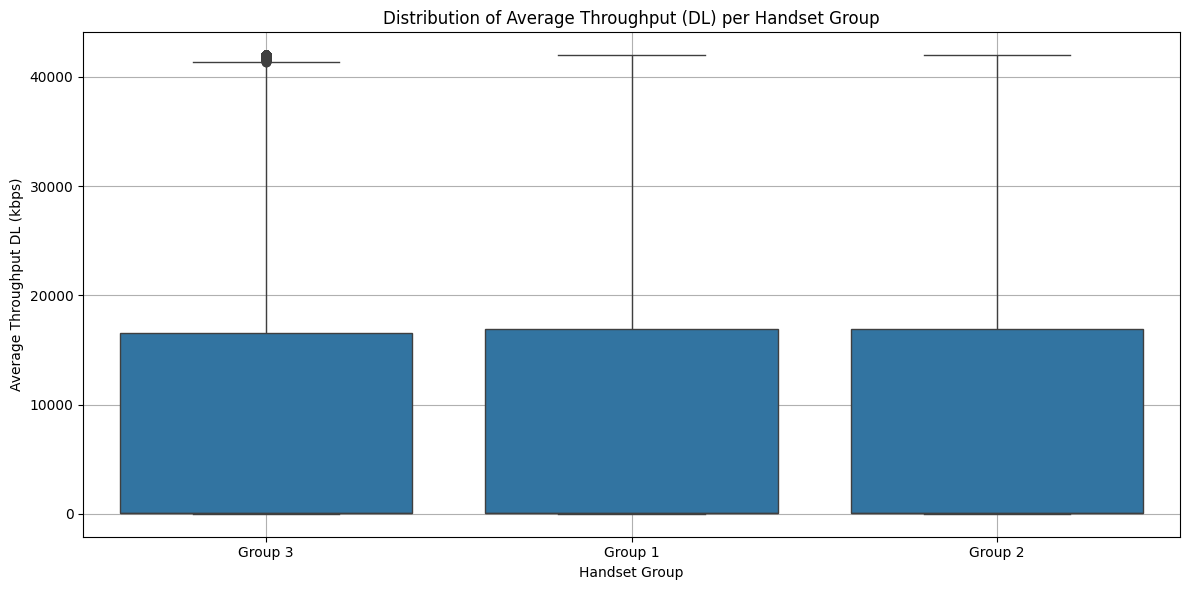

In [ ]:
# Plot Distribution of Average Throughput per Handset Group
plt.figure(figsize=(12, 6))
sns.boxplot(x='handset_group', y='avg_throughput_dl_kbps', data=aggregated_experience)
plt.title('Distribution of Average Throughput (DL) per Handset Group')
plt.xlabel('Handset Group')
plt.ylabel('Average Throughput DL (kbps)')
plt.grid()
plt.tight_layout()
plt.savefig("throughput_distribution_split.png")
plt.show()

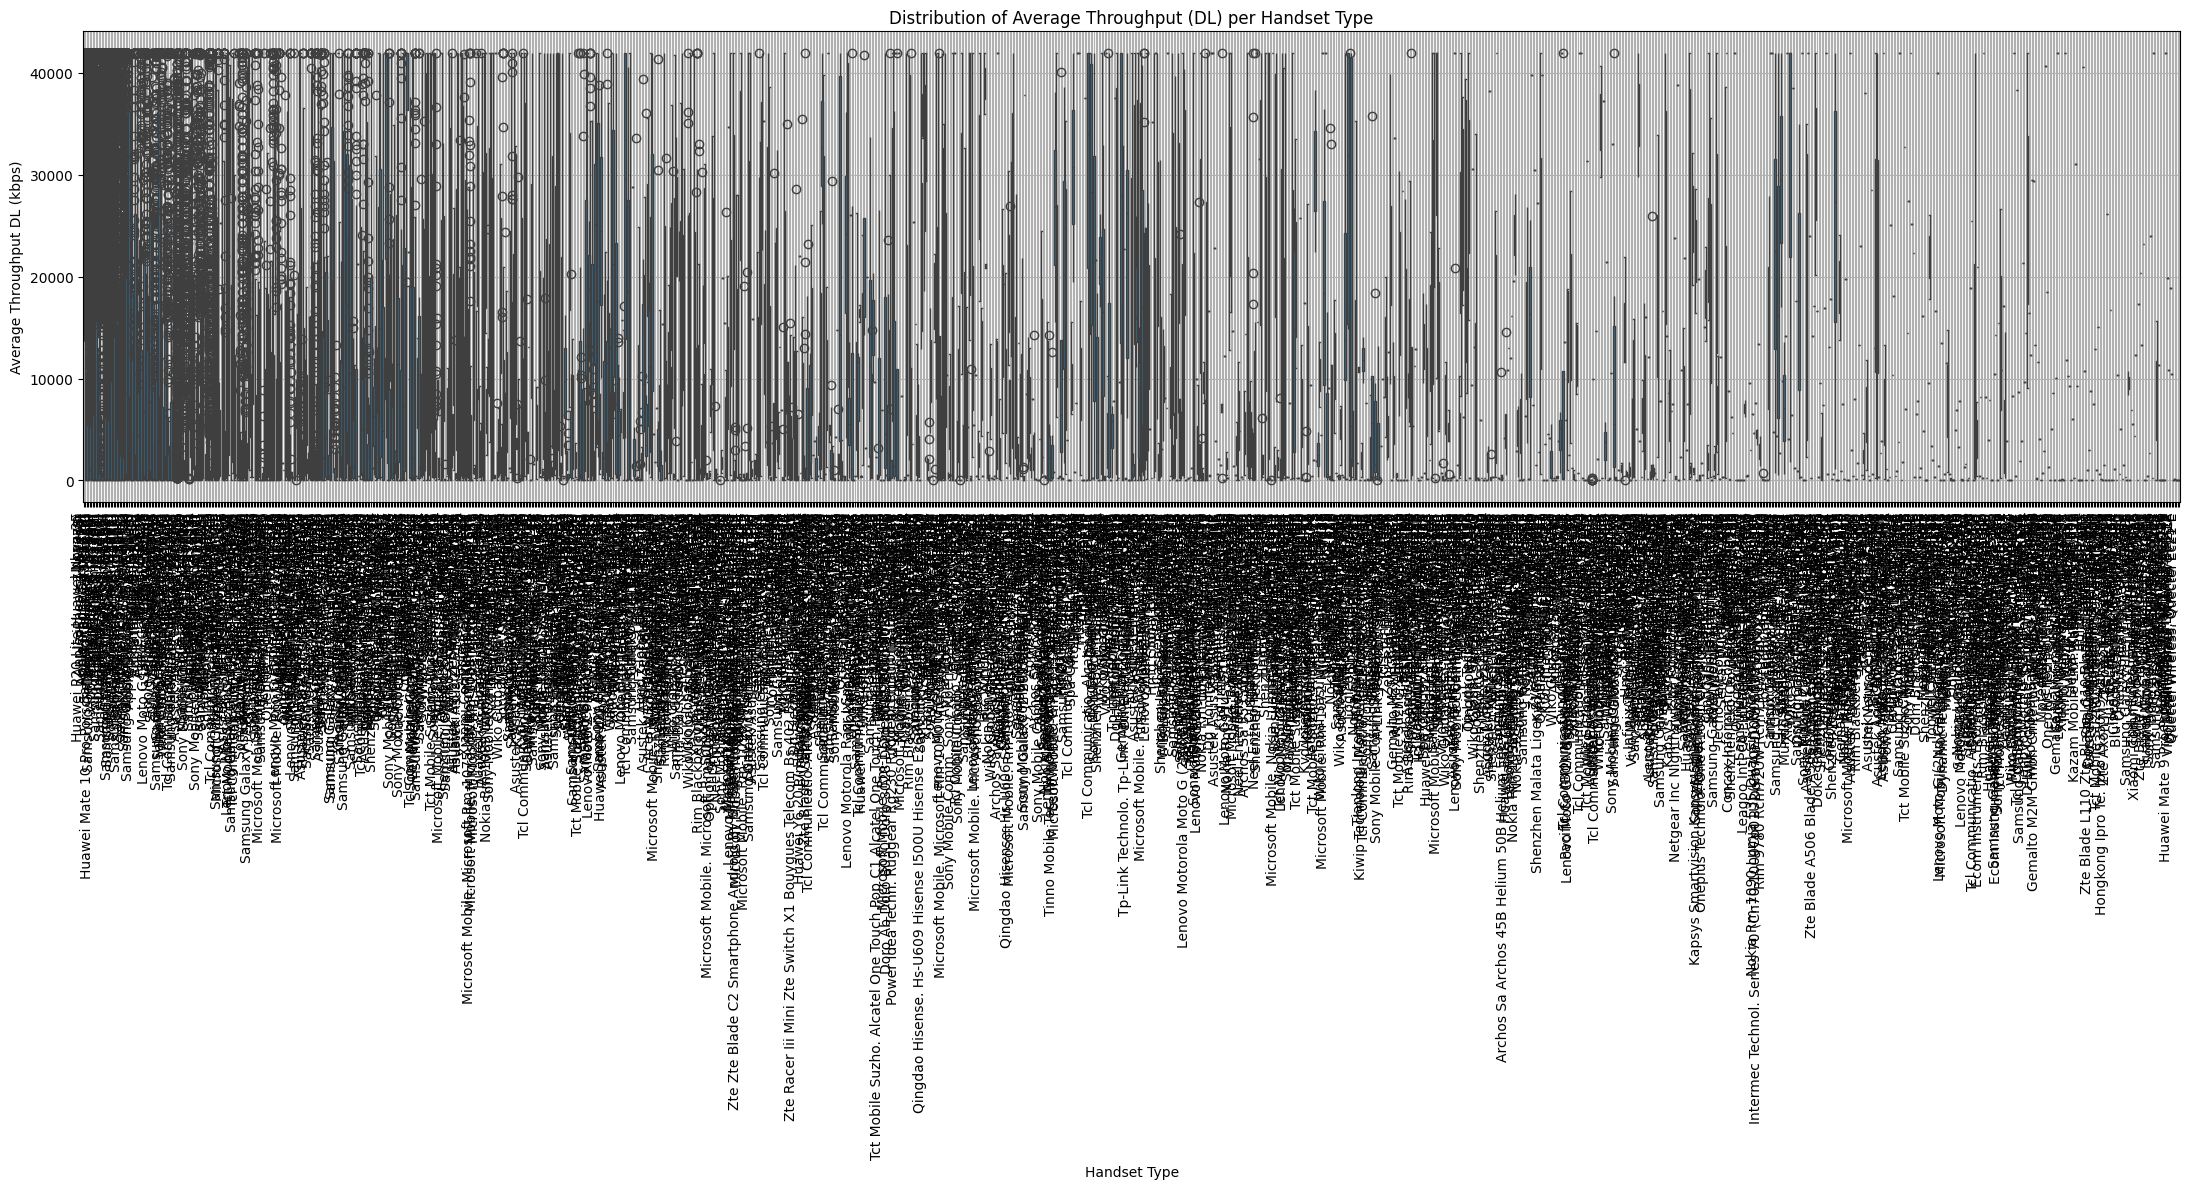

In [ ]:
# Distribution of Average Throughput per Handset Type
plt.figure(figsize=(22, 12))
sns.boxplot(x='most_used_handset', y='avg_throughput_dl_kbps', data=aggregated_experience)
plt.title('Distribution of Average Throughput (DL) per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput DL (kbps)')
plt.xticks(rotation=90, ha='right')
plt.grid()
plt.tight_layout()
plt.savefig("throughput_distribution.png")  # Save the figure
plt.show()


Interpretation: The boxplot shows how different handset types perform in terms of downlink throughput.

 -Devices with higher median throughput values indicate better performance, whereas wider IQR suggests higher variation in throughput across users.

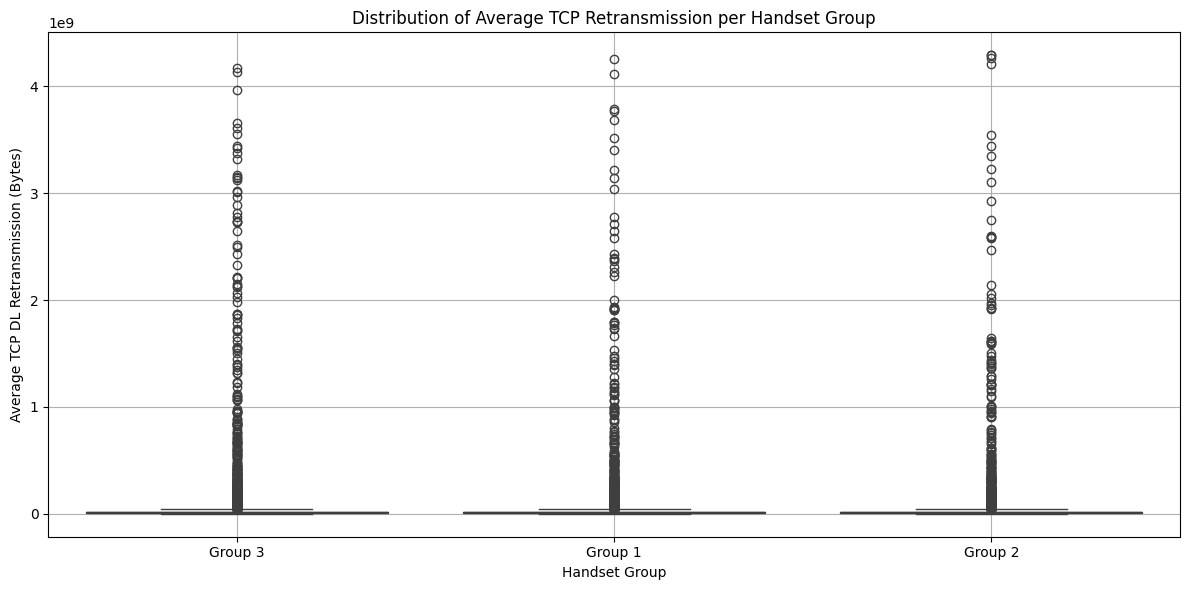

In [ ]:
# Plot Distribution of Average TCP Retransmission per Handset Group
plt.figure(figsize=(12, 6))
sns.boxplot(x='handset_group', y='avg_tcp_dl_retrans_bytes', data=aggregated_experience)
plt.title('Distribution of Average TCP Retransmission per Handset Group')
plt.xlabel('Handset Group')
plt.ylabel('Average TCP DL Retransmission (Bytes)')
plt.grid()
plt.tight_layout()
plt.savefig("tcp_retransmission_distribution_split.png")
plt.show()

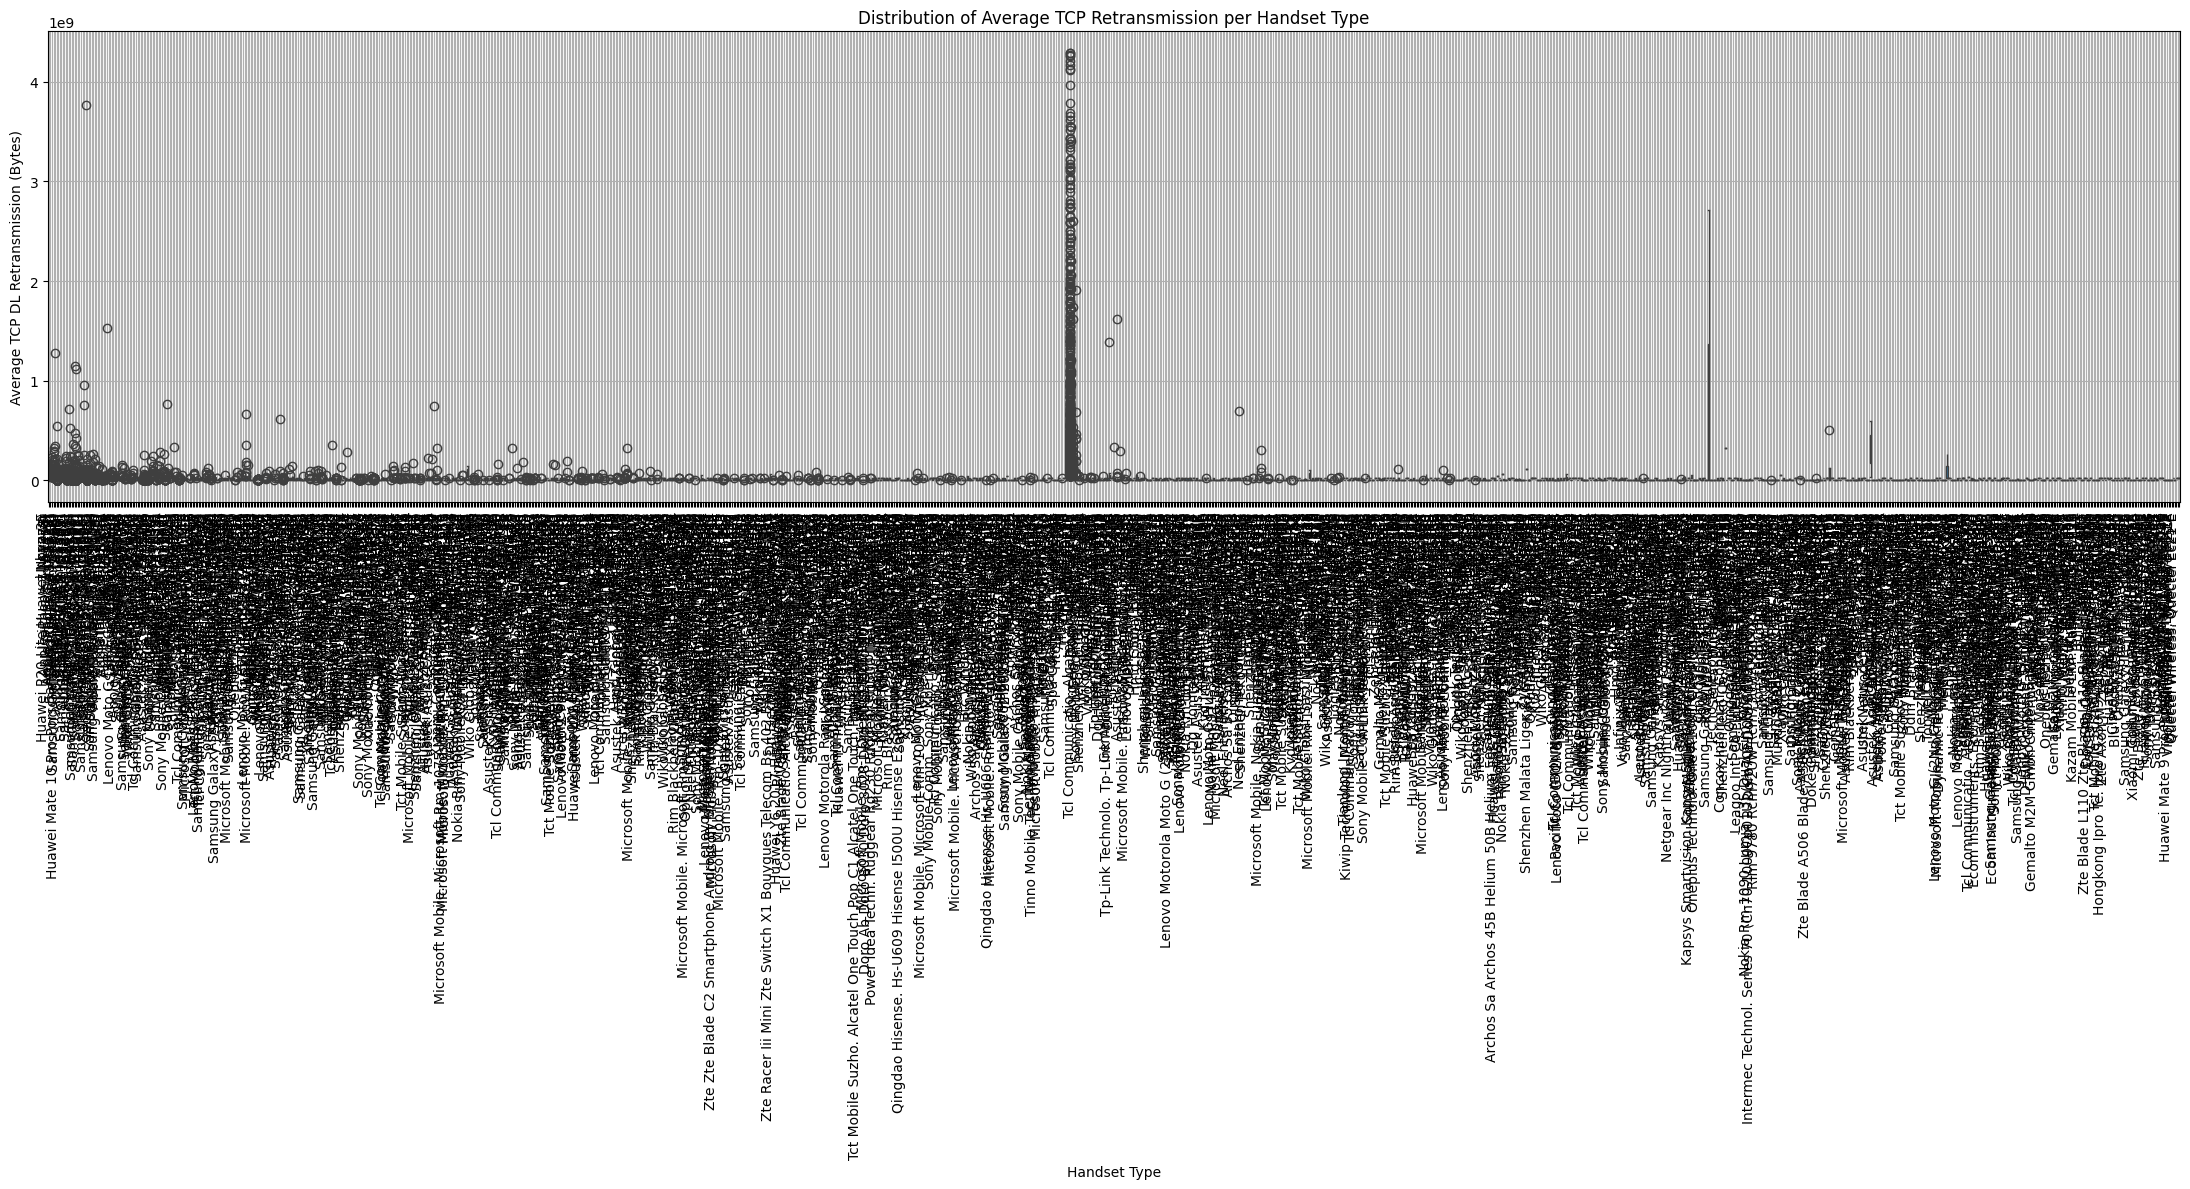

In [ ]:
# Distribution of Average TCP Retransmission per Handset Type
plt.figure(figsize=(22, 12))
sns.boxplot(x='most_used_handset', y='avg_tcp_dl_retrans_bytes', data=aggregated_experience)
plt.title('Distribution of Average TCP Retransmission per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average TCP DL Retransmission (Bytes)')
plt.xticks(rotation=90, ha='right')
plt.grid()
plt.tight_layout()
plt.savefig("tcp_retransmission_distribution.png")  # Save the figure
plt.show()

Interpretation: The boxplot indicates how frequently different handset types experience TCP retransmissions.

- Higher retransmissions may indicate connectivity issues, while lower retransmissions signify stable network performance.

In [ ]:
# Summarize throughput statistics per handset type
throughput_summary = aggregated_experience.groupby('most_used_handset')['avg_throughput_dl_kbps'].describe()
tcp_summary = aggregated_experience.groupby('most_used_handset')['avg_tcp_dl_retrans_bytes'].describe()

In [ ]:
throughput_summary.head()

count     mean  std      min      25%  \
most_used_handset                                                          
A-Link Telecom I. Cubot A5           1.0  23184.0  NaN  23184.0  23184.0   
A-Link Telecom I. Cubot Note Plus    1.0   6527.0  NaN   6527.0   6527.0   
A-Link Telecom I. Cubot Note S       1.0   8515.0  NaN   8515.0   8515.0   
A-Link Telecom I. Cubot Nova         1.0  41975.5  NaN  41975.5  41975.5   
A-Link Telecom I. Cubot Power        1.0  41975.5  NaN  41975.5  41975.5   

                                       50%      75%      max  
most_used_handset                                             
A-Link Telecom I. Cubot A5         23184.0  23184.0  23184.0  
A-Link Telecom I. Cubot Note Plus   6527.0   6527.0   6527.0  
A-Link Telecom I. Cubot Note S      8515.0   8515.0   8515.0  
A-Link Telecom I. Cubot Nova       41975.5  41975.5  41975.5  
A-Link Telecom I. Cubot Power      41975.5  41975.5  41975.5

In [ ]:
tcp_summary.head()

count          mean  std           min  \
most_used_handset                                                           
A-Link Telecom I. Cubot A5           1.0  2.080991e+07  NaN  2.080991e+07   
A-Link Telecom I. Cubot Note Plus    1.0  6.023490e+05  NaN  6.023490e+05   
A-Link Telecom I. Cubot Note S       1.0  4.134448e+07  NaN  4.134448e+07   
A-Link Telecom I. Cubot Nova         1.0  1.358400e+05  NaN  1.358400e+05   
A-Link Telecom I. Cubot Power        1.0  7.799000e+03  NaN  7.799000e+03   

                                            25%           50%           75%  \
most_used_handset                                                             
A-Link Telecom I. Cubot A5         2.080991e+07  2.080991e+07  2.080991e+07   
A-Link Telecom I. Cubot Note Plus  6.023490e+05  6.023490e+05  6.023490e+05   
A-Link Telecom I. Cubot Note S     4.134448e+07  4.134448e+07  4.134448e+07   
A-Link Telecom I. Cubot Nova       1.358400e+05  1.358400e+05  1.358400e+05   
A-Link Telecom I. Cubot Power      7.799000e+03  7.799000e+03  7.799000e+03   

                                            max  
most_used_handset                                
A-Link Telecom I. Cubot A5         2.080991e+07  
A-Link Telecom I. Cubot Note Plus  6.023490e+05  
A-Link Telecom I. Cubot Note S     4.134448e+07  
A-Link Telecom I. Cubot Nova       1.358400e+05  
A-Link Telecom I. Cubot Power      7.799000e+03

In [ ]:
# Save summary statistics for reporting purposes
throughput_summary.to_csv("throughput_summary.csv")
tcp_summary.to_csv("tcp_summary.csv")

In [ ]:
# Download files manually for Google Colab users
try:
    from google.colab import files
    files.download("throughput_distribution.png")
    files.download("tcp_retransmission_distribution.png")
    files.download("throughput_summary.csv")
    files.download("tcp_summary.csv")
except ImportError:
    print("Download function not available outside Google Colab.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(aggregated_experience.columns.tolist())

['msisdn/number', 'avg_tcp_dl_retrans_bytes', 'avg_tcp_ul_retrans_bytes', 'avg_rtt_dl_ms', 'avg_rtt_ul_ms', 'avg_throughput_dl_kbps', 'avg_throughput_ul_kbps', 'most_used_handset', 'handset_group']


Task 3.4 - Clustering User Experiences
Deliverables:

• Python Script and Slides Including:

 - Perform k-means clustering (k=3) based on experience metrics.
 - Segment users into experience groups and provide a brief description of each cluster based on data insights.

In [ ]:
experience_metrics = aggregated_experience[['avg_tcp_dl_retrans_bytes', 'avg_tcp_ul_retrans_bytes',
                                            'avg_rtt_dl_ms', 'avg_rtt_ul_ms',
                                            'avg_throughput_dl_kbps', 'avg_throughput_ul_kbps']]

In [ ]:
experience_metrics.isna().sum()

avg_tcp_dl_retrans_bytes    0
avg_tcp_ul_retrans_bytes    0
avg_rtt_dl_ms               0
avg_rtt_ul_ms               0
avg_throughput_dl_kbps      0
avg_throughput_ul_kbps      0
dtype: int64

In [ ]:
# Standardizing the data to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(experience_metrics)

In [ ]:
X_scaled

array([[-0.03643544, -0.02427754,  0.2946397 ,  0.05153056,  0.38422553,
         1.21167471],
       [ 0.00714415,  0.00190987, -0.12430997, -0.22843993, -0.66451674,
        -0.68857826],
       [ 0.00714415,  0.00190987, -0.15194718, -0.21483696, -0.66375786,
        -0.67501659],
       ...,
       [ 0.00714415,  0.00190987, -0.01411402,  0.01182768, -0.66700036,
        -0.73265371],
       [ 0.00714415,  0.00190987, -0.01411402,  0.01182768, -0.66631047,
        -0.70779064],
       [ 0.00714415,  0.00190987, -0.01411402,  0.01182768, -0.66693137,
        -0.73265371]])

In [ ]:
# Performing K-Means Clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
aggregated_experience['experience_cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# Count number of users in each cluster
cluster_counts = aggregated_experience['experience_cluster'].value_counts()
print("\nCluster Distribution:\n", cluster_counts)


Cluster Distribution:
 experience_cluster
0    77975
1    28878
2        4
Name: count, dtype: int64


In [ ]:
# Calculate cluster centroids and interpret results
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=experience_metrics.columns)

In [ ]:
cluster_centers_df

avg_tcp_dl_retrans_bytes  avg_tcp_ul_retrans_bytes  avg_rtt_dl_ms  \
0              1.698387e+07              6.617281e+05     128.018839   
1              2.854771e+07              6.859613e+05      90.809719   
2              1.221375e+08              1.806782e+09     113.187500   

   avg_rtt_ul_ms  avg_throughput_dl_kbps  avg_throughput_ul_kbps  
0      13.664580             2037.878216              170.822041  
1      25.243719            30282.628423             1937.997063  
2      36.625000            37904.062500             2443.000000

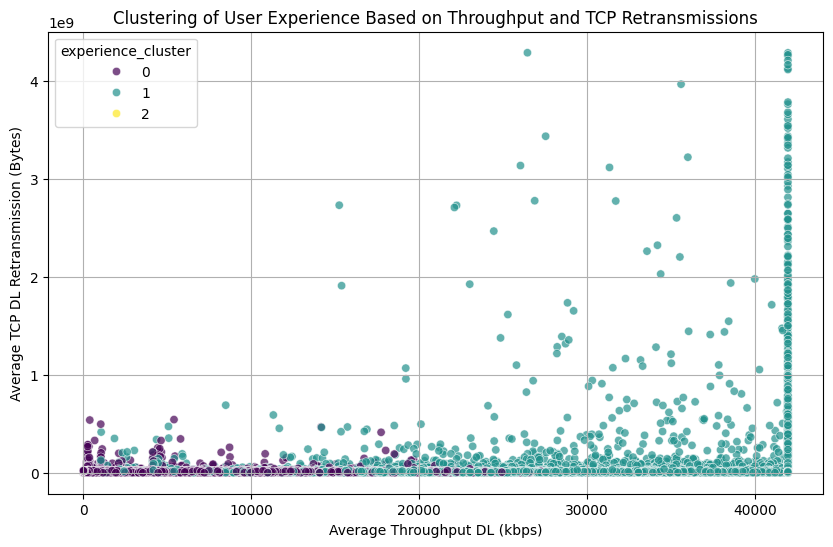

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=aggregated_experience['avg_throughput_dl_kbps'],
                y=aggregated_experience['avg_tcp_dl_retrans_bytes'],
                hue=aggregated_experience['experience_cluster'],
                palette='viridis', alpha=0.7)
plt.title('Clustering of User Experience Based on Throughput and TCP Retransmissions')
plt.xlabel('Average Throughput DL (kbps)')
plt.ylabel('Average TCP DL Retransmission (Bytes)')
plt.grid()
plt.savefig("user_experience_clusters.png")
plt.show()

In [ ]:
# Provide a brief description of each cluster based on data insights
cluster_descriptions = aggregated_experience.groupby('experience_cluster').agg({
    'avg_tcp_dl_retrans_bytes': 'mean',
    'avg_rtt_dl_ms': 'mean',
    'avg_throughput_dl_kbps': 'mean',
    'avg_tcp_ul_retrans_bytes': 'mean',
    'avg_rtt_ul_ms': 'mean',
    'avg_throughput_ul_kbps': 'mean'
}).reset_index()

In [ ]:
cluster_descriptions

experience_cluster  avg_tcp_dl_retrans_bytes  avg_rtt_dl_ms  \
0                   0              1.698586e+07     128.028917   
1                   1              2.853753e+07      90.797969   
2                   2              1.221375e+08     113.187500   

   avg_throughput_dl_kbps  avg_tcp_ul_retrans_bytes  avg_rtt_ul_ms  \
0             2035.368001              6.617675e+05      13.664614   
1            30277.669526              6.858447e+05      25.238815   
2            37904.062500              1.806782e+09      36.625000   

   avg_throughput_ul_kbps  
0              170.703931  
1             1937.581645  
2             2443.000000

In [ ]:
# Save the cluster analysis results
cluster_descriptions.to_csv("user_experience_clusters_summary.csv", index=False)

In [ ]:
# Save processed data with cluster labels
aggregated_experience.to_csv("user_experience_with_clusters.csv", index=False)

In [ ]:
# Download files manually for Google Colab users
try:
    from google.colab import files
    files.download("user_experience_clusters_summary.csv")
    files.download("user_experience_clusters.png")
    files.download("user_experience_with_clusters.csv")
except ImportError:
    print("Download function not available outside Google Colab.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Cluster 0: High-Performance Users**

Characteristics:
- Low TCP retransmissions: Indicates minimal packet loss and reliable network performance.
- Low RTT (Round Trip Time): Users experience fast response times, implying low latency.
- High throughput: Users benefit from higher download/upload speeds, suitable for bandwidth-intensive activities.

Interpretation:
- These users likely experience optimal network conditions with minimal connectivity issues.
- They are suitable for activities such as video streaming, online gaming, and large data downloads.

# **Cluster 1: Moderate-Performance Users**

Characteristics:
- Moderate TCP retransmissions: Some packet loss may occur, affecting reliability.
- Moderate RTT: Response times are acceptable but not ideal for real-time applications.
- Moderate throughput: Users have reasonable data speeds but may face occasional slowdowns.

Interpretation:
- These users experience an average network performance, which is sufficient for web browsing, social media, and video calls.
- Occasional connectivity issues might occur, particularly during peak hours or in congested areas.


# **Cluster 2: Low-Performance Users**

Characteristics:
- High TCP retransmissions: Frequent packet loss leads to unstable connections.
High RTT: Users experience long response times, leading to delays.
- Low throughput: Poor data speeds that impact overall experience.

Interpretation:
- These users likely face significant connectivity issues, possibly due to poor network coverage, device limitations, or high network congestion.
- They may struggle with real-time applications like video conferencing, online gaming, or cloud-based services.
- They might require troubleshooting or a network upgrade to improve their experience.

Key Findings and Recommendations:

For Cluster 0: Encourage premium data plans and high-speed services to maximize their experience.

For Cluster 1: Provide optimization solutions to enhance performance during peak times.

For Cluster 2: Recommend network troubleshooting, device upgrades, or relocation to areas with better coverage.
